# Logistic Regression
## Perceptron Trick
### From Scratch in 2D Data

In [18]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False, class_sep=20)

<IPython.core.display.Javascript object>


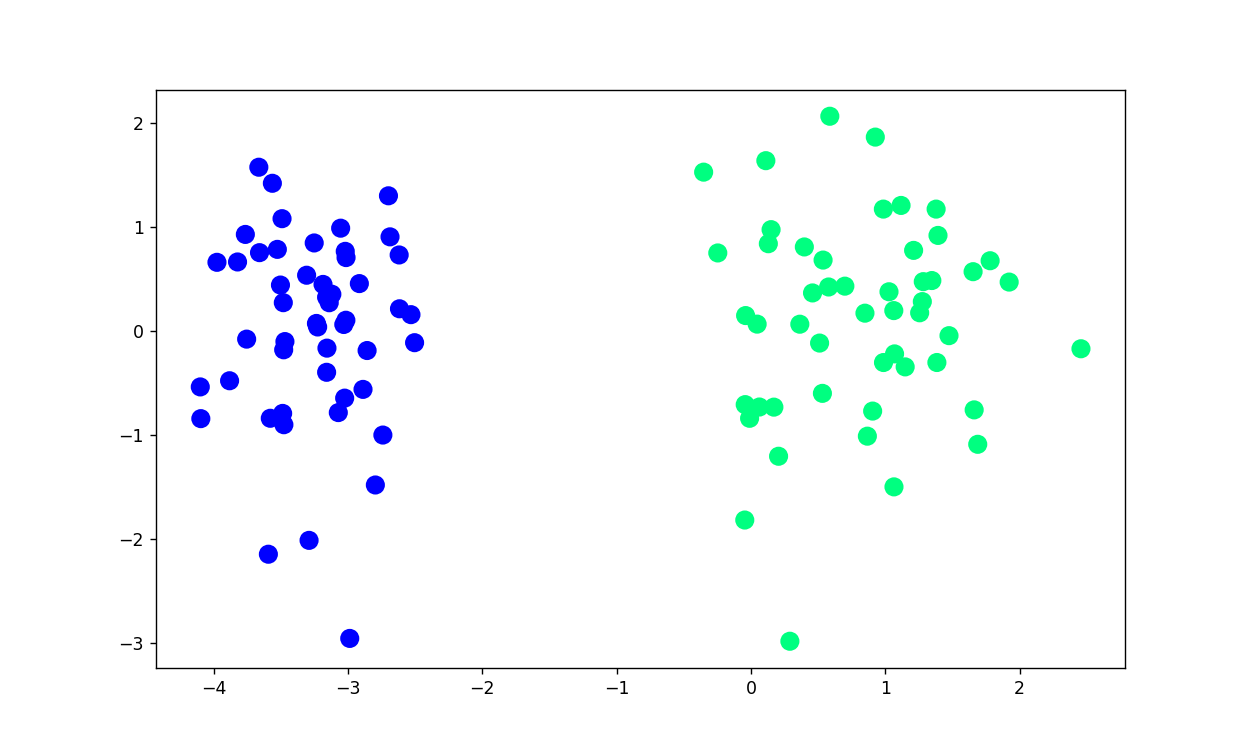

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [20]:
def step(z):
    return 1 if z>0 else 0

def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0], weights[1:]

In [21]:
intercept_, coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.0580085  0.40381514]
1.2000000000000002


In [22]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [23]:
x_input = np.linspace(-3,3,100)
y_input = m * x_input + b

<IPython.core.display.Javascript object>


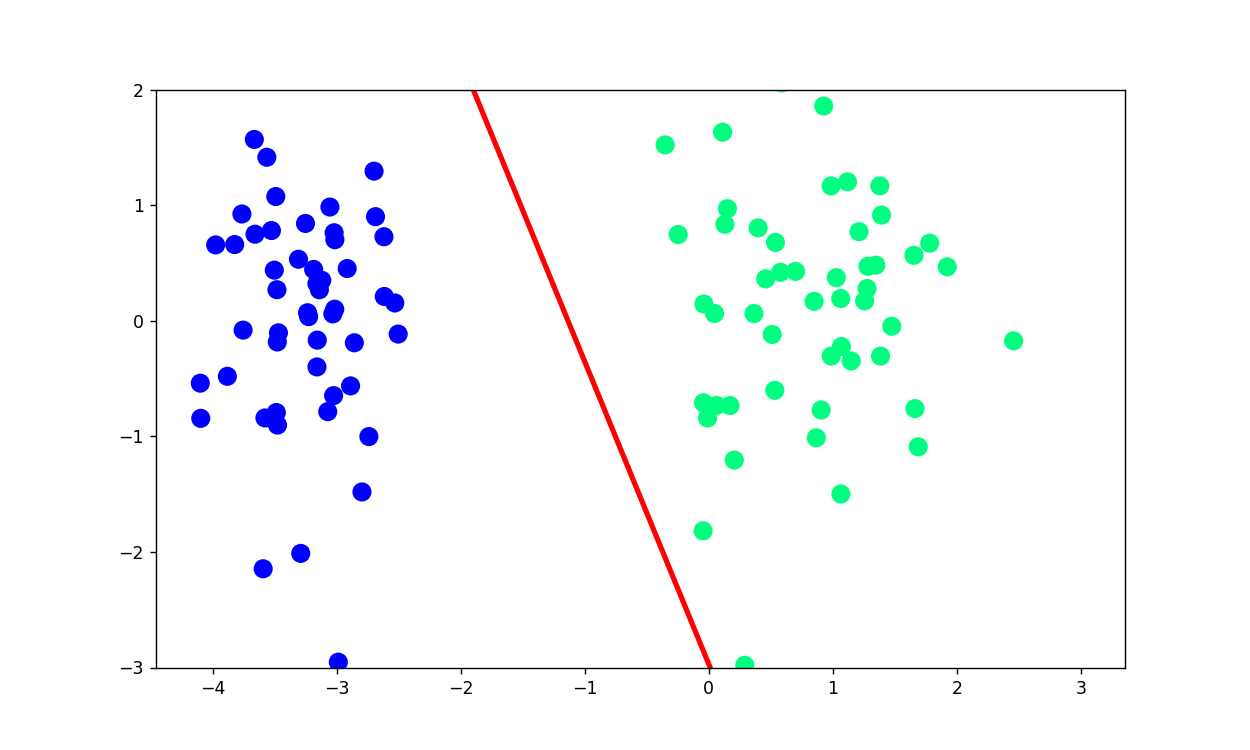

(-3.0, 2.0)

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Animation

In [10]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [11]:
m,b = perceptron(X,y)

In [12]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


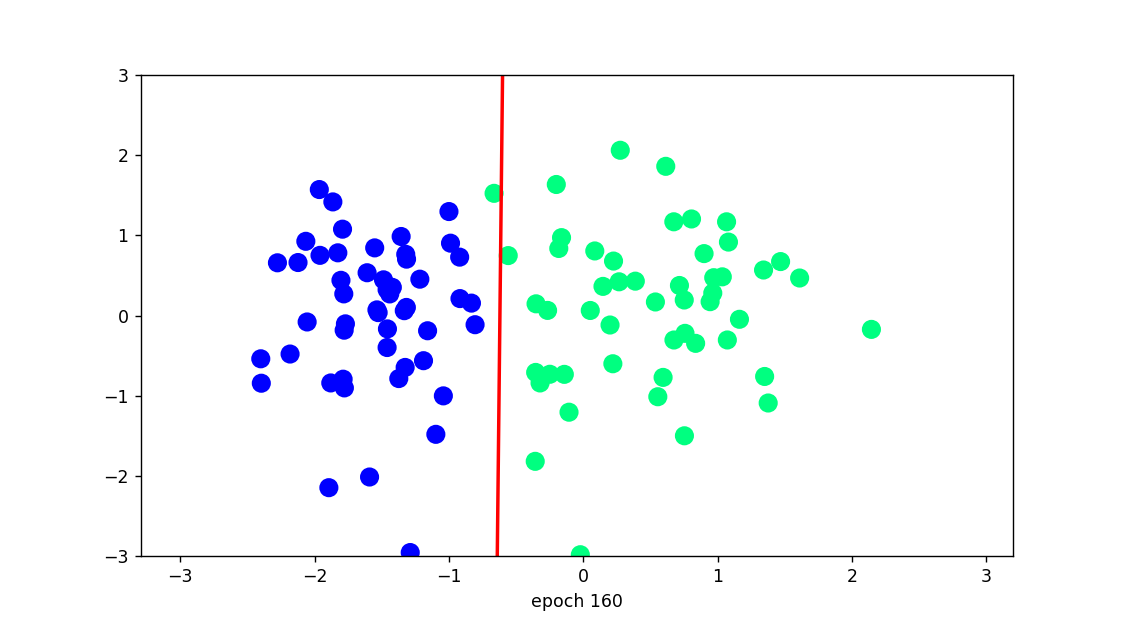

In [13]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

### Using Scikit Learn

In [25]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [26]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [27]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

<IPython.core.display.Javascript object>


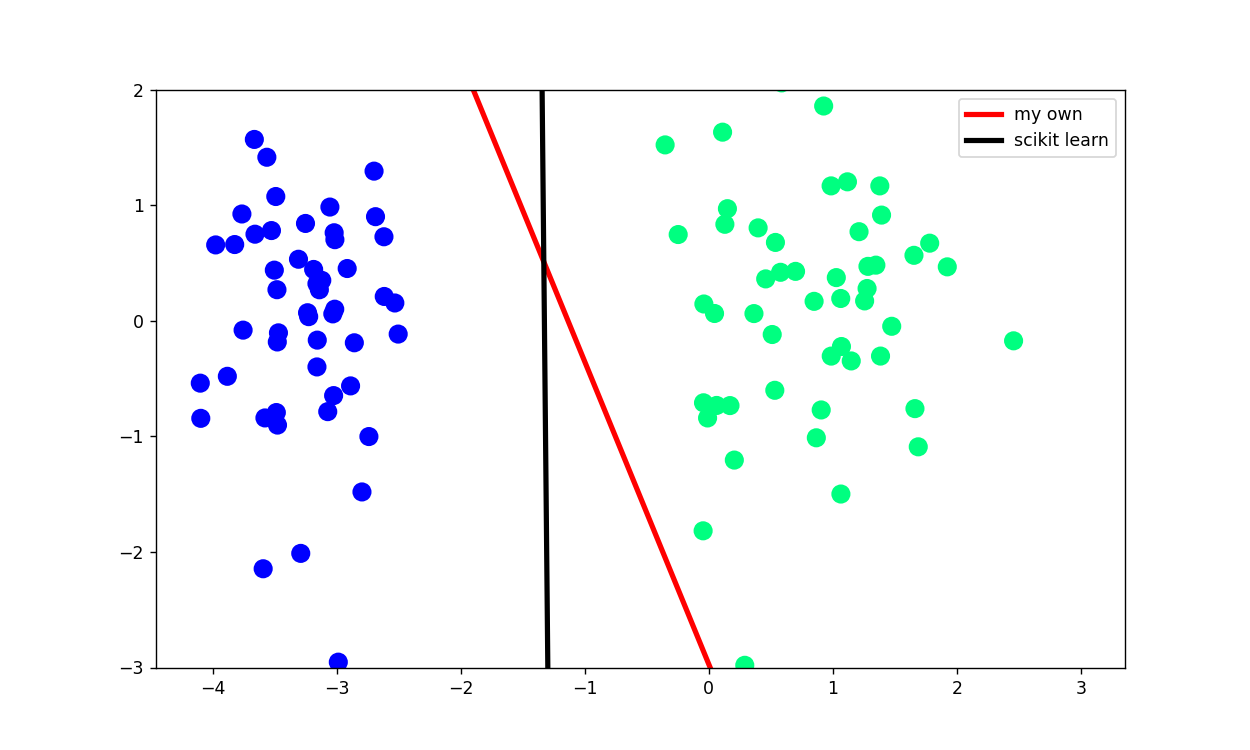

(-3.0, 2.0)

In [28]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3, label = "my own")
plt.plot(x_input1,y_input1,color='black',linewidth=3, label = "scikit learn")
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.legend()
plt.ylim(-3,2)

### Sigmoid Function

In [29]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [30]:
intercept_,coef_ = perceptron(X,y)

In [31]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [32]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

<IPython.core.display.Javascript object>


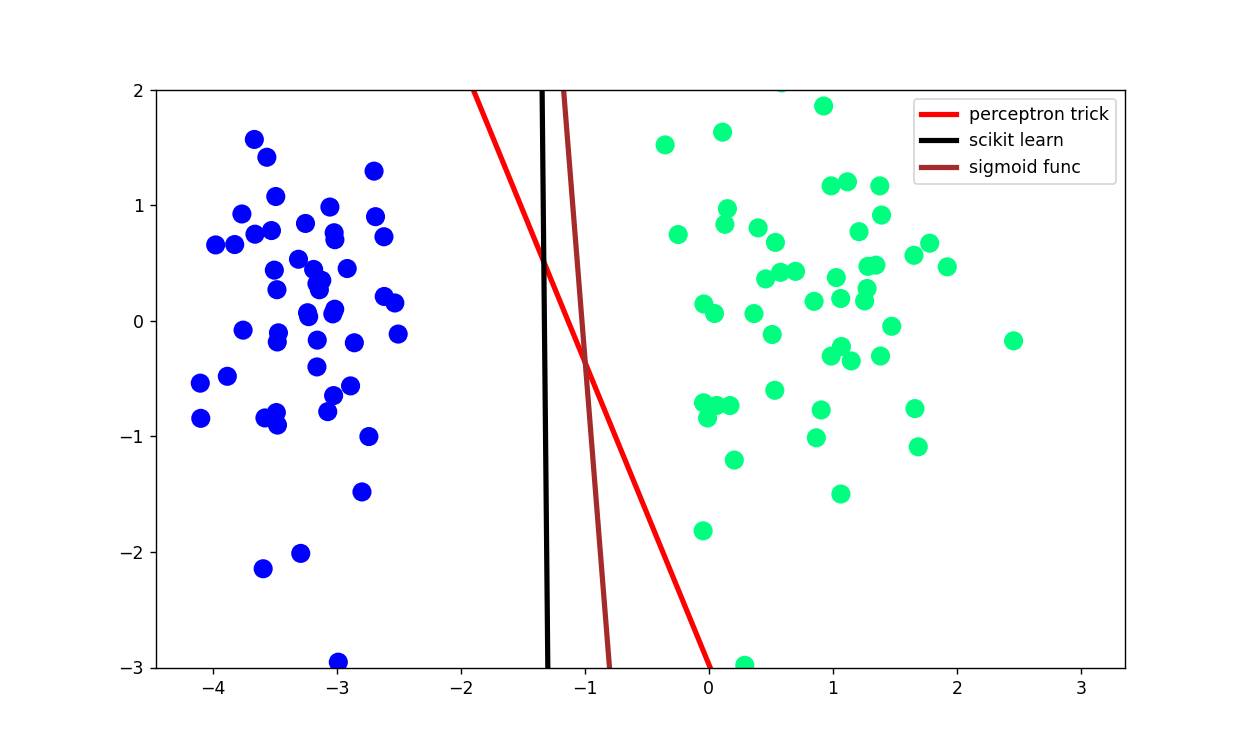

In [34]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3, label="perceptron trick")
plt.plot(x_input1,y_input1,color='black',linewidth=3, label = "scikit learn")
plt.plot(x_input2,y_input2,color='brown',linewidth=3, label = "sigmoid func")
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.legend()
plt.ylim(-3,2)
plt.show()

**Slighly improved the model but not the best one. Have to improve.**

### Maximum Likelihood & Cross Entropy

In [3]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

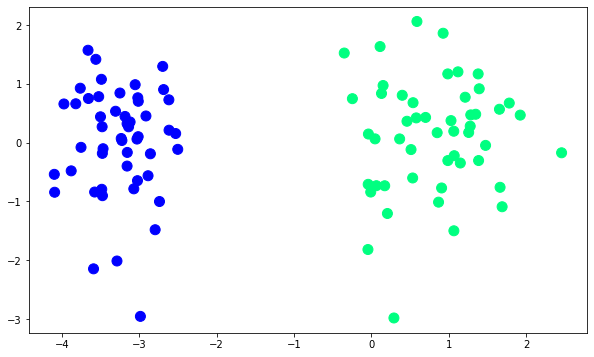

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

LogisticRegression(penalty='none', solver='sag')

In [6]:
print(lor.coef_)
print(lor.intercept_)

[[4.87916843 0.23341307]]
[5.84142488]


In [7]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def gd(X, y):
    
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr * (np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:], weights[0]  # intercept, coef

In [10]:
coef_,intercept_ = gd(X,y)

In [11]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [12]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

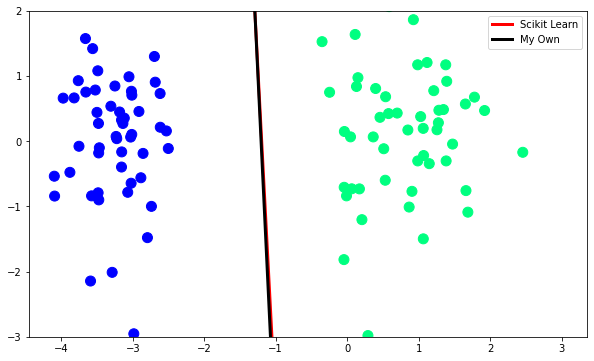

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3, label = "Scikit Learn")
plt.plot(x_input1, y_input1, color='black', linewidth=3, label = "My Own")
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.legend()
plt.ylim(-3,2)
plt.show()

# SoftMax Regression

In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df = df[['sepal_length','petal_length','species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [5]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
clf = LogisticRegression(multi_class='multinomial')

In [7]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [8]:
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [9]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [10]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [11]:
clf.predict(query)

array([0])

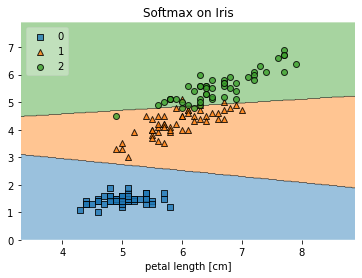

In [12]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()

# Polynomial Logistic Regression
Notebook link: https://github.com/campusx-official/100-days-of-machine-learning/blob/main/day60-logistic-regression-contd/polynomial-logistic-regression.ipynb

## Without Polynomial Features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [ ]:
df = pd.read_csv('ushape.csv')
df.head()

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
clf.fit(X,y)

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

## Using Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [ ]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

In [ ]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

In [ ]:
plot_decision_boundary(X,y)

In [ ]:
plot_decision_boundary(X,y,degree=2)

In [ ]:
plot_decision_boundary(X,y,degree=3)

In [ ]:
plot_decision_boundary(X,y,degree=4)

In [ ]:
plot_decision_boundary(X,y,degree=5)

In [ ]:
plot_decision_boundary(X,y,degree=6)

In [ ]:
plot_decision_boundary(X,y,degree=7)

In [ ]:
plot_decision_boundary(X,y,degree=25)